In [2]:
ticker = 'aapl'

In [9]:
ticker = ticker.upper()

from IPython.display import Markdown, display
display(Markdown('# Report for {}'.format(ticker)))
display(Markdown('In this section we have some boilerplate stuff about Apple'))

# Report for AAPL

In this section we have some boilerplate stuff about Apple

## Performance

Now some discussion of the performance, as well as some charts

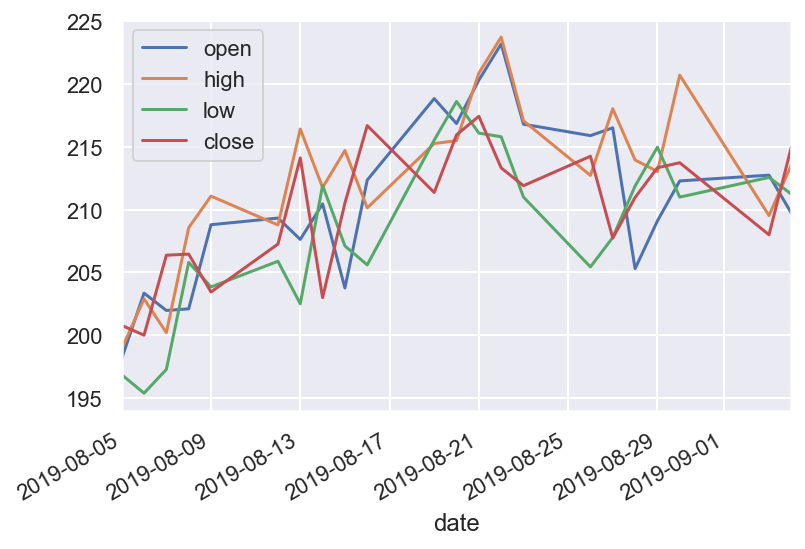

In [14]:
%matplotlib inline
import pyEX
import lantern as l
import pandas as pd
import seaborn as sns

sns.set()

display(Markdown('## Performance'))
display(Markdown('Now some discussion of the performance, as well as some charts'))

c = pyEX.Client('Tpk_ecc89ddf30a611e9958142010a80043c', version='sandbox')
df = c.chartDF(ticker)
df[['open', 'high', 'low', 'close']].plot()

## Peer Correlation

Now another section and additional discussion

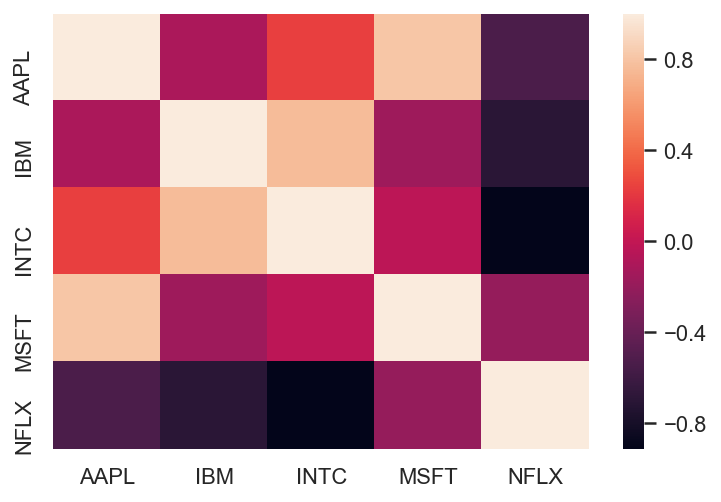

In [15]:
display(Markdown('## Peer Correlation'))
display(Markdown('Now another section and additional discussion'))


peers = c.peers(ticker)
# doest work for test
peers = ['AAPL', 'IBM', 'NFLX', 'MSFT', 'INTC']
to_merge = {x: c.chartDF(x) for x in peers}
to_merge.update({ticker: df})
all = sorted(list(set(peers + [ticker])))
rets = pd.concat(to_merge)
rets = rets.unstack(0)['changePercent'][all]
rets = rets.corr()
rets['symbol'] = rets.index
sns.heatmap(rets.corr())

In [17]:
display(Markdown('## Disclosures'))
display(Markdown('Finally some required disclosures and whatnot'))

## Disclosures

Finally some required disclosures and whatnot